# Explore experiences result on NCBI

In [2]:
import sys
sys.path.insert(1, '../../utils/')

from resultsUtils import build_jsons, json2pandas
from visuClass import visualizer

import numpy as np
import matplotlib.pyplot as plt 


%load_ext autoreload
%autoreload 2

# Build jsons

In [3]:
# fetch results and store in different paths
path2jsons = '../jsons/'

In [8]:
build_jsons('../results/', path2jsons, show_path=False)

100%|██████████| 37/37 [01:12<00:00,  1.96s/it]

Collected 35 xperiences in ../results/ and stored all in ../jsons/


# Analysis

In [3]:
#!rm ../../jsons/.ipynb_checkpoints -rf

In [4]:
df = json2pandas(path2jsons, trajs = False, fixed_iter=None, verbose=False)

##  Pubmed embeddings

(30, 16)


,best_iter,char_embedding_size,char_hidden_layer_size,dropout_rate,f1,feature_data,hidden_layer_size,nb_iter,nb_train_tokens,opt_decay_use,patience,precision,recall,time_elapsed,word_emb_dim,word_emb_train
0,20,24,32,0.5,78.80,False,64,30,128557.0,False,10,78.85,78.75,453.0,25,True
0,18,24,32,0.5,79.83,False,64,28,128557.0,False,10,79.04,80.62,62.0,25,True
0,15,24,32,0.5,79.33,False,64,25,128557.0,False,10,78.55,80.12,56.0,25,True
0,11,24,32,0.5,78.75,False,64,21,128557.0,False,10,78.75,78.75,47.0,25,True
0,19,24,32,0.5,79.24,False,64,29,128557.0,False,10,78.13,80.38,65.0,25,True


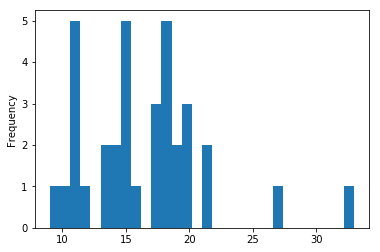

In [5]:
df['best_iter'].plot(kind = 'hist', bins = 30)
df = df.iloc[:30]
print(df.shape)
df.head(5)

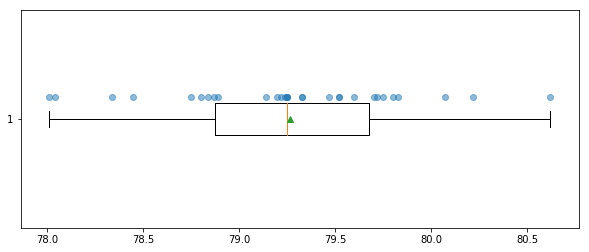

average:  79.26733333333333
sd:  0.5916921121288958
max diff:  2.6099999999999994
max diff perc:  0.03345724907063196


In [89]:
plt.figure(figsize=(10,4))
plt.boxplot(df['f1'], vert=False, showmeans=True)
plt.scatter(df['f1'], np.repeat(1.1, len(df['f1'])), alpha = 0.5)
plt.show()
print('average: ', np.mean(df['f1']))
print('sd: ', np.std(df['f1']))
print('max diff: ', np.max(df['f1']) - np.min(df['f1']))
print('max diff perc: ', (np.max(df['f1']) - np.min(df['f1']))/np.min(df['f1']))

## Describe datasets